<a href="https://colab.research.google.com/github/plaban1981/TMLC/blob/main/neural_network_on_higgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Higgs boson machine learning challenge using KERAS

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


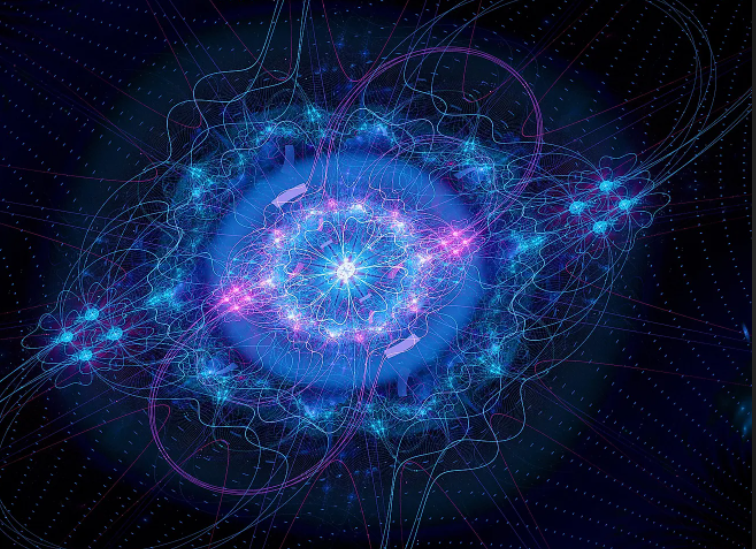

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#
import matplotlib.pyplot as plt
import seaborn as sns
#
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Data Description

• Dataset of 250000 events, with an ID column, 30 feature columns, a weight column and a label column. 

Some details to get started: 

• all variables are floating point, except PRI_jet_num which is integer 

• variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector. 

• variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS 

• it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

In [2]:
#df = pd.read_csv('training.csv',nrows=30000)
df = pd.read_csv("/content/drive/MyDrive/TMLC/Higg_bosson/training.csv")


In [3]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df.shape

(250000, 33)

In [15]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [24]:
df.describe(include='all')

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164333
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767,NaN
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103,NaN
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502,NaN
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636,NaN
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188,NaN
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128,NaN


In [26]:
cnt = df['EventId'].nunique()
cnt

250000

In [27]:
drop_cols = []
for i in df.columns :
  if df[i].nunique() == len(df):
    drop_cols.append(i)

  
drop_cols

['EventId']

## Check for null values if any

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

* There are no missing values

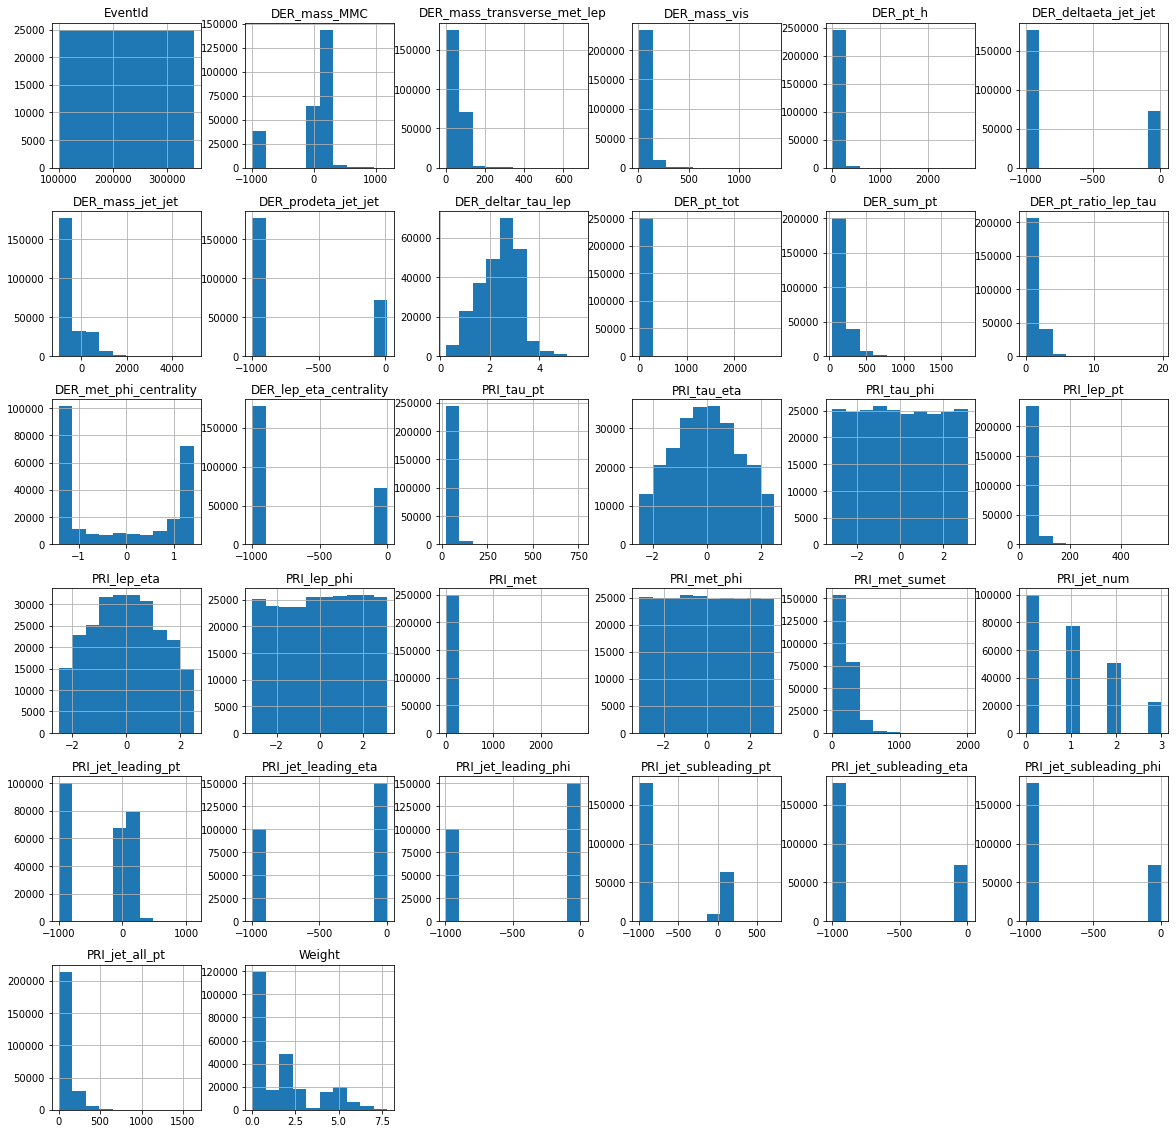

In [7]:
df.hist(figsize = (20,20))
plt.show()

## Correlation between features

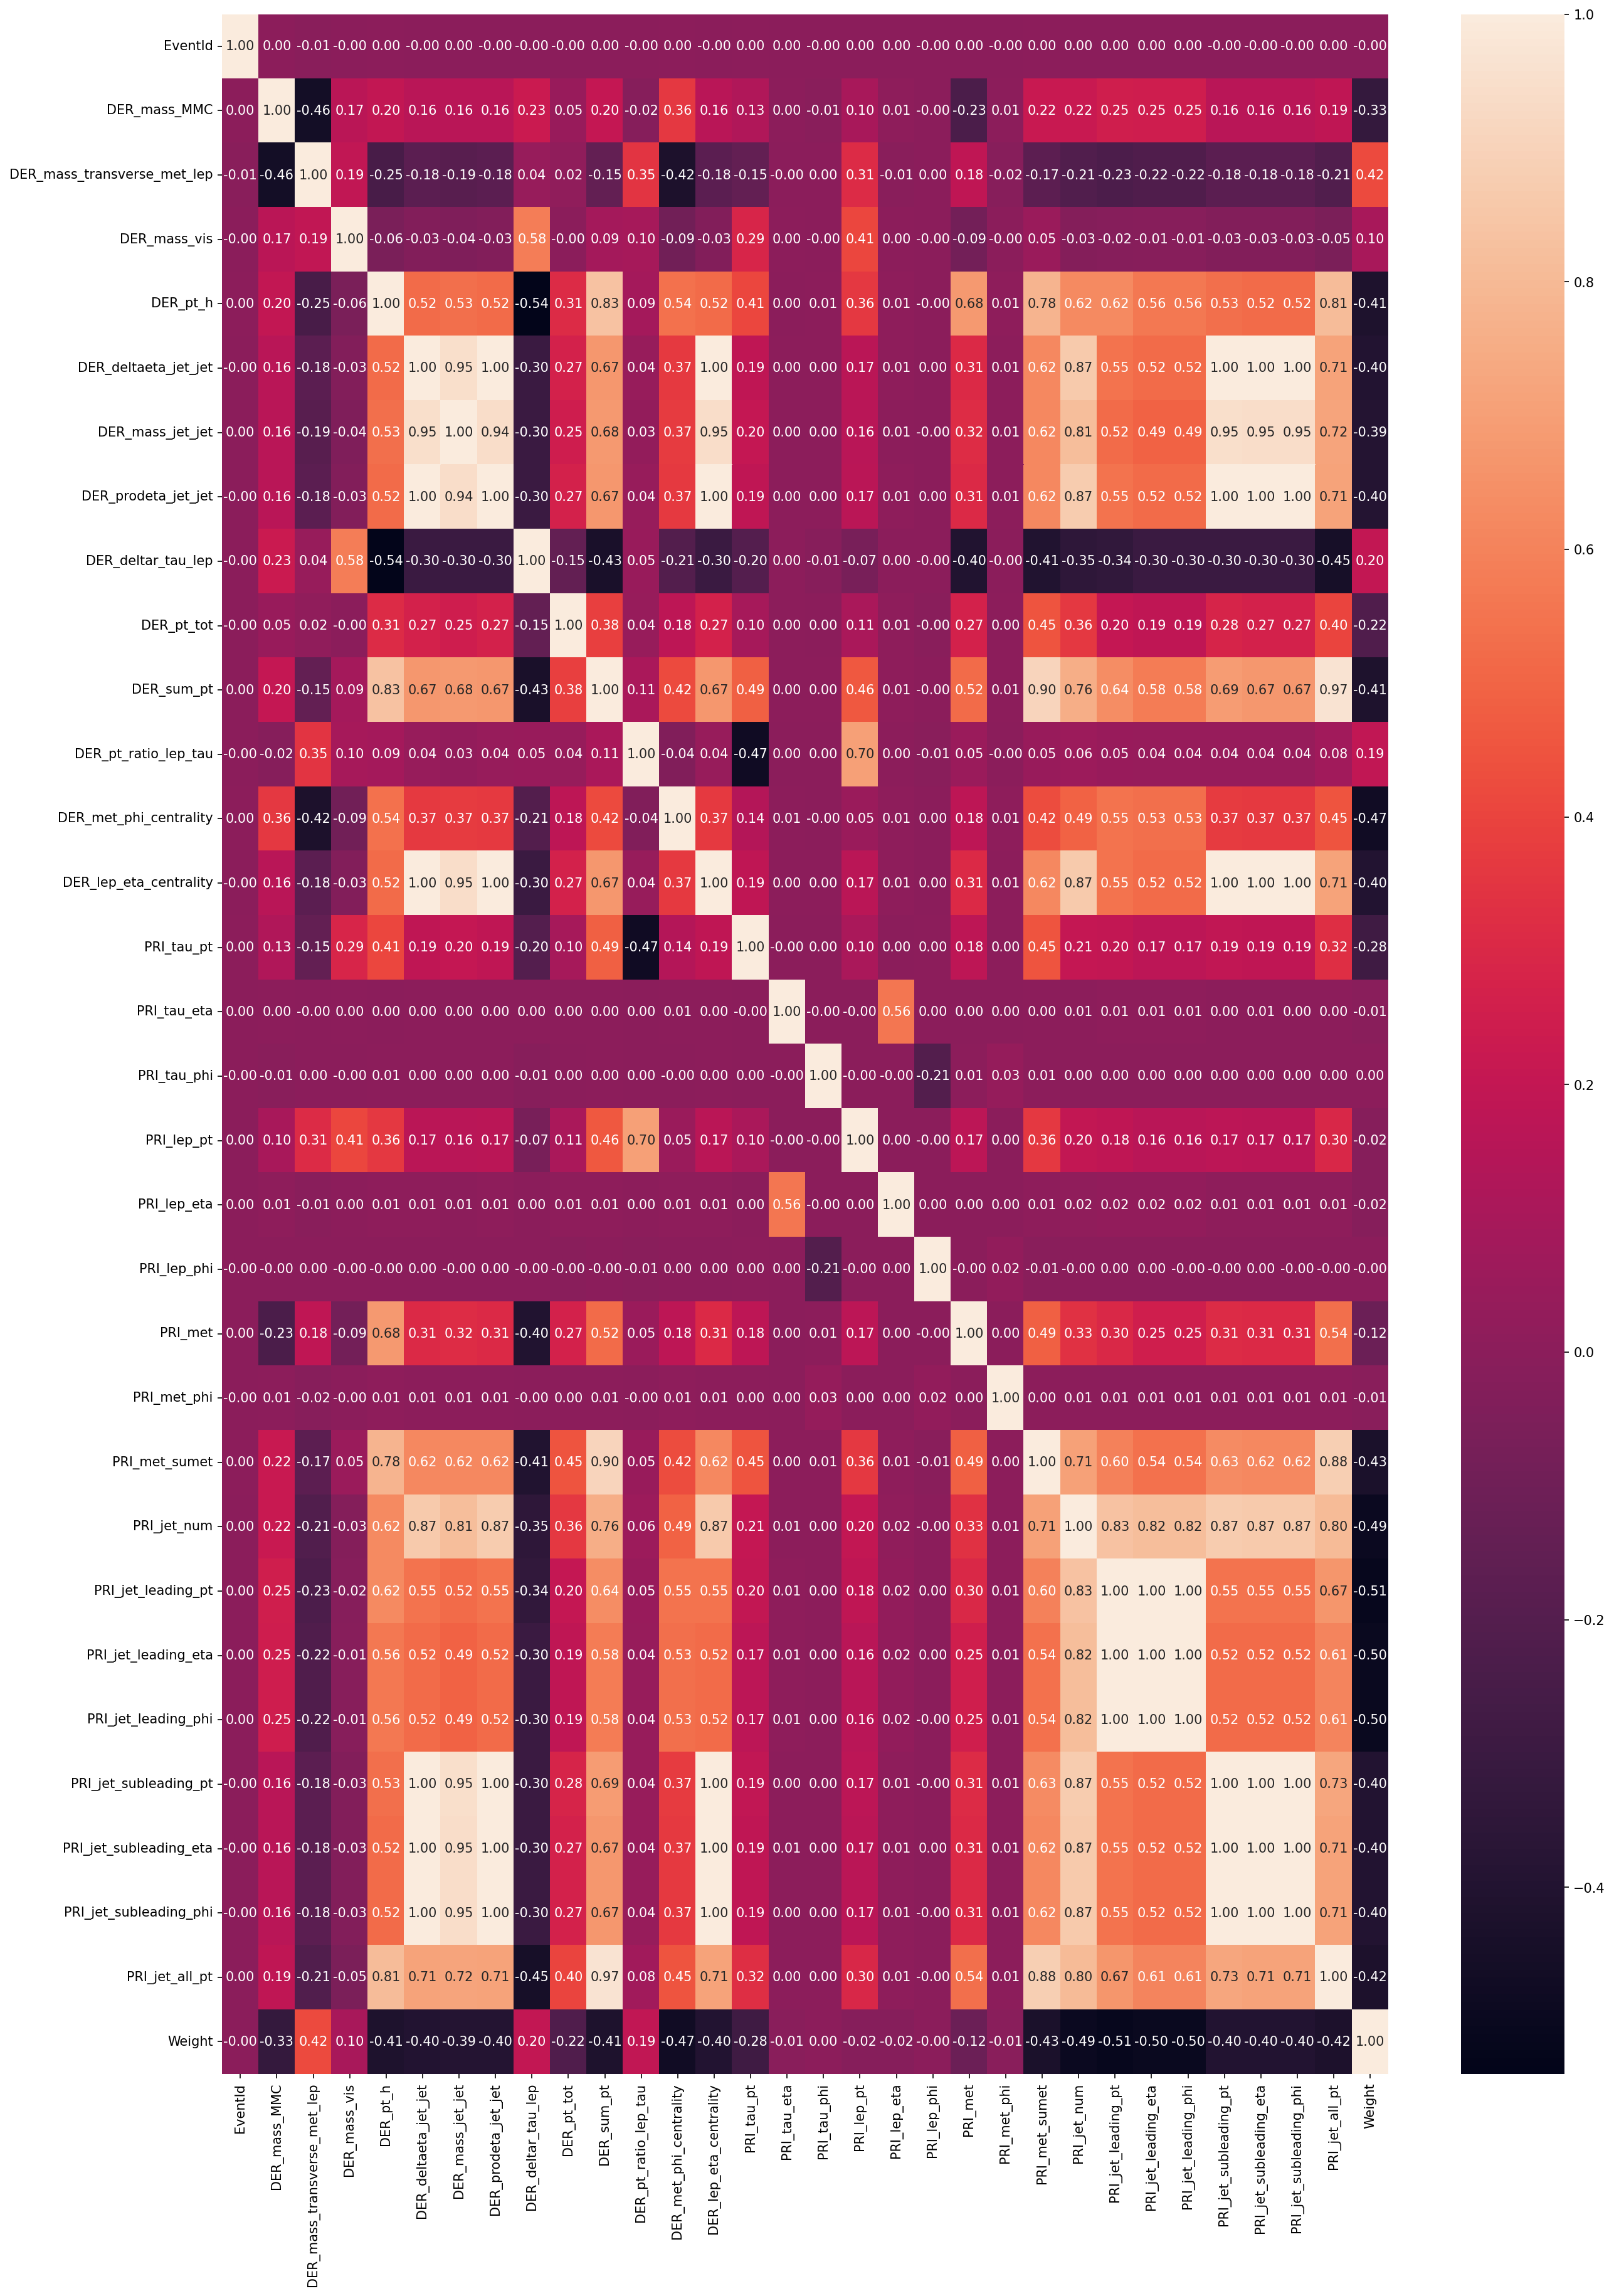

In [8]:
plt.figure(figsize=(20,29),dpi=150)
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

## Separate Features and Labels

In [28]:
X = df.drop(drop_cols + ['Label'],axis=1)
y = df['Label']
#
y = y.replace('s',1)
y = y.replace('b',0)


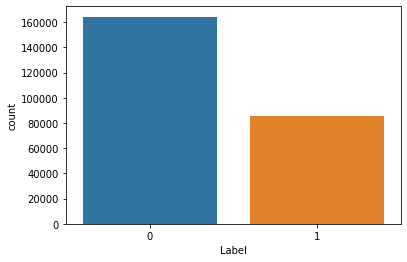

In [21]:
sns.countplot(y)
plt.show()

In [29]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333


## Visualize Target

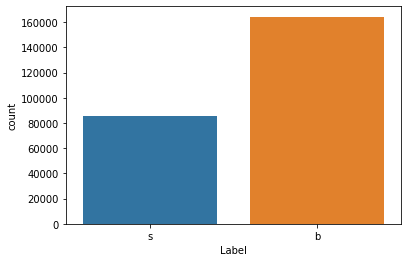

In [19]:
sns.countplot(df['Label'])
plt.show()

## Drop Correlated Features

In [9]:
#!pip install feature_engine

In [30]:
from feature_engine.selection import DropCorrelatedFeatures
tr = DropCorrelatedFeatures(variables=None, method="pearson", threshold=0.85)

Xt = tr.fit_transform(X)

print(f"set of correlated features :{tr.correlated_feature_sets_}")

set of correlated features :[{'DER_prodeta_jet_jet', 'PRI_jet_subleading_phi', 'PRI_jet_subleading_pt', 'DER_mass_jet_jet', 'PRI_jet_num', 'PRI_jet_subleading_eta', 'DER_deltaeta_jet_jet', 'DER_lep_eta_centrality'}, {'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_sum_pt'}, {'PRI_jet_leading_pt', 'PRI_jet_leading_phi', 'PRI_jet_leading_eta'}]


In [31]:
Xt.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_jet_leading_pt',
       'Weight'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2)

In [34]:
print(X_train.shape,X_test.shape)

(200000, 31) (50000, 31)


## Normalize Data

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [33]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [35]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=31, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [36]:
model = create_baseline()

In [37]:
history = model.fit(X_train,y_train,validation_data =(X_test,y_test), epochs=80)

Epoch 1/80
6250/6250 [==============================] - 17s 2ms/step - loss: 1.0291 - accuracy: 0.8380 - val_loss: 0.4230 - val_accuracy: 0.7490
Epoch 2/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.2512 - accuracy: 0.8938 - val_loss: 0.2345 - val_accuracy: 0.9041
Epoch 3/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.2027 - accuracy: 0.9197 - val_loss: 0.1716 - val_accuracy: 0.9335
Epoch 4/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.1820 - accuracy: 0.9302 - val_loss: 0.3499 - val_accuracy: 0.9314
Epoch 5/80
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1764 - accuracy: 0.9336 - val_loss: 0.1318 - val_accuracy: 0.9602
Epoch 6/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1625 - accuracy: 0.9406 - val_loss: 0.1508 - val_accuracy: 0.9438
Epoch 7/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1619 - accuracy: 0.9421 - val_loss: 0.1572 - val_ac

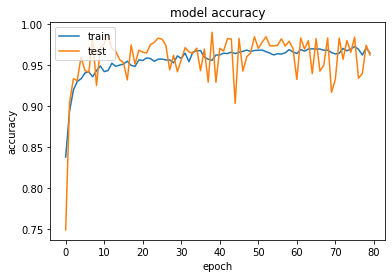

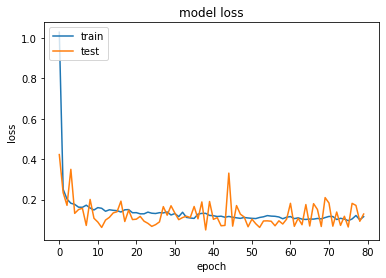

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Train Model on Normalized Data

In [40]:
history = model.fit(X_train_scaled,y_train,validation_data =(X_test_scaled,y_test), epochs=80)

Epoch 1/80
6250/6250 [==============================] - 16s 3ms/step - loss: 0.0760 - accuracy: 0.9714 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 2/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0218 - val_accuracy: 0.9944
Epoch 3/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9860
Epoch 4/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0119 - val_accuracy: 0.9971
Epoch 5/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0084 - val_accuracy: 0.9976
Epoch 6/80
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.1879 - val_accuracy: 0.9594
Epoch 7/80
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0065 - val_ac

## Visualize accuracy and loss

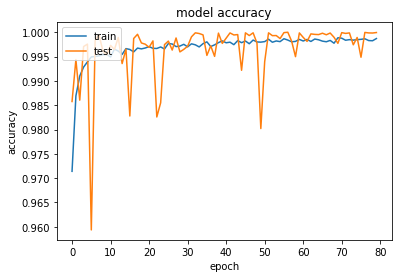

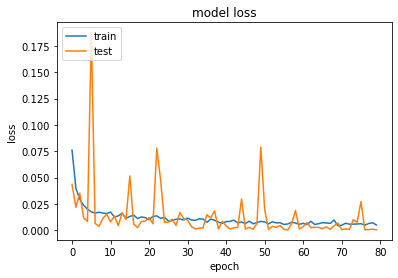

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the trained Model

In [42]:
 tf.keras.models.save_model(model,'/content/drive/MyDrive/TMLC/Higg_bosson/Higgs.h5')

In [43]:
model1 = tf.keras.models.load_model('/content/drive/MyDrive/TMLC/Higg_bosson/Higgs.h5')

In [44]:
model1.predict(X_test)

array([[0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       ...,
       [9.051674e-06],
       [0.000000e+00],
       [0.000000e+00]], dtype=float32)

In [47]:
def prediction(model,input):
    prediction = model.predict(input)
    return 's' if prediction[0][0] >= 0.5 else 'b'

prediction(model1,X_test_scaled[1:])


'b'

## Define a checkpoint callback :

In [48]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [49]:
history = model.fit(X_train_scaled,y_train,validation_data =(X_test_scaled,y_test), epochs=100,callbacks=callbacks_list)


Epoch 1/100
6237/6250 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9987
Epoch 1: val_loss improved from inf to 0.00237, saving model to Weights-001--0.00237.hdf5
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0024 - val_accuracy: 0.9998
Epoch 2/100
6241/6250 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9988
Epoch 2: val_loss improved from 0.00237 to 0.00080, saving model to Weights-002--0.00080.hdf5
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 7.9841e-04 - val_accuracy: 0.9998
Epoch 3/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9987
Epoch 3: val_loss improved from 0.00080 to 0.00068, saving model to Weights-003--0.00068.hdf5
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 6.8157e-04 - val_accuracy: 0.9999
Epoch 4/100
623

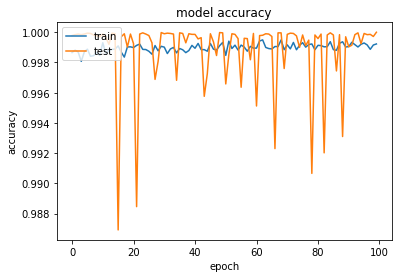

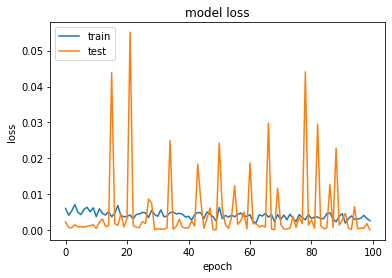

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Load weights file of the best model :

In [50]:
import shutil
shutil.copy("/content/Weights-049--0.00014.hdf5","/content/drive/MyDrive/TMLC/Higg_bosson")

'/content/drive/MyDrive/TMLC/Higg_bosson/Weights-049--0.00014.hdf5'

In [52]:
wights_file = '/content/Weights-049--0.00014.hdf5' # choose the best checkpoint 
model.load_weights(wights_file) # load it
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## Save the model

In [55]:
 tf.keras.models.save_model(model,'/content/drive/MyDrive/TMLC/Higg_bosson/Higgs_chk.h5')

In [53]:
predictions = model.predict(X_test_scaled)

## Predictions

In [57]:
predictions

array([[0.0000000e+00],
       [1.6661196e-24],
       [0.0000000e+00],
       ...,
       [9.9999797e-01],
       [7.4184041e-29],
       [0.0000000e+00]], dtype=float32)

In [58]:
preds = []
for pred in predictions:
  preds.append('s' if pred[0] >= 0.5 else 'b')

## Visualize Predictions

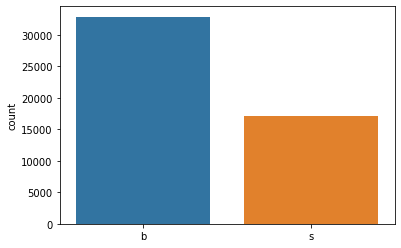

In [59]:
sns.countplot(preds)